In [1]:
import numpy as np
import matplotlib.pyplot as plt
import muram as mio
from astropy.io import fits
from scipy.stats import pearsonr

<h1>Loading data; $\Delta t$ = 30s and FWHM = {1200, 600, 300, 100}km</h1>

In [2]:
# Define function for temporal averaging
def temporal_avg(data_in, start, end):
    tmp_avg = np.mean(data_in[start:end], axis = 0)
    return tmp_avg

In [3]:
# Let us load the FLCT derived velocities for all given combinations, starting with 1200km
Vx_1200 = fits.open("pyFLCT_fwhm_1200_dt_30_Inte_tracked.fits")[0].data
Vy_1200 = fits.open("pyFLCT_fwhm_1200_dt_30_Inte_tracked.fits")[1].data

In [4]:
Vx_600 = fits.open("pyFLCT_fwhm_600_dt_30_Inte_tracked.fits")[0].data
Vy_600 = fits.open("pyFLCT_fwhm_600_dt_30_Inte_tracked.fits")[1].data

In [5]:
Vx_300 = fits.open("pyFLCT_fwhm_300_dt_30_Inte_tracked.fits")[0].data
Vy_300 = fits.open("pyFLCT_fwhm_300_dt_30_Inte_tracked.fits")[1].data

In [6]:
Vx_100 = fits.open("pyFLCT_fwhm_100_dt_30_Inte_tracked.fits")[0].data
Vy_100 = fits.open("pyFLCT_fwhm_100_dt_30_Inte_tracked.fits")[1].data

In [7]:
# After that, we shall load velocities taken directly from simulation
Vx = fits.open("Velocities.fits")[1].data # Vy from Velocities.fits as originally thought
Vy = fits.open("Velocities.fits")[0].data # Vx from Velocities.fits as originally thought
Vx = Vx.transpose(0, 2, 1)
Vy = Vy.transpose(0, 2, 1)

In [8]:
# Our next task is to to average velocities using previously defined function
# We shall use the first half of total slices for that
Vx_mean_sim = temporal_avg(Vx, 0, 180)
Vx_mean_sim = Vx_mean_sim/1E5

Vy_mean_sim = temporal_avg(Vy, 0, 180)
Vy_mean_sim = Vy_mean_sim/1E5

In [9]:
Vx_FLCT_1200 = temporal_avg(Vx_1200, 0, 180)
Vy_FLCT_1200 = temporal_avg(Vy_1200, 0, 180)

In [10]:
Vx_FLCT_600 = temporal_avg(Vx_600, 0, 180)
Vy_FLCT_600 = temporal_avg(Vy_600, 0, 180)

In [11]:
Vx_FLCT_300 = temporal_avg(Vx_300, 0, 180)
Vy_FLCT_300 = temporal_avg(Vy_300, 0, 180)

In [12]:
Vx_FLCT_100 = temporal_avg(Vx_100, 0, 180)
Vy_FLCT_100 = temporal_avg(Vy_100, 0, 180)

<h2>Filter simulation velocities using Gaussian</h2>

In [13]:
from scipy.ndimage import gaussian_filter

In [98]:
# sigma = 35
Vx_filtered35 = gaussian_filter(Vx_mean_sim, 35, mode = "wrap")
Vy_filtered35 = gaussian_filter(Vy_mean_sim, 35, mode = "wrap")

In [99]:
r_x = []
r_1200_35 = pearsonr(Vx_FLCT_1200.flatten(), Vx_filtered35.flatten()) 
print(r_1200_35)

PearsonRResult(statistic=0.8873157838566976, pvalue=0.0)


In [100]:
r_x.append(r_1200_35[0])

In [101]:
r_600_35 = pearsonr(Vx_FLCT_600.flatten(), Vx_filtered35.flatten())
print(r_600_35)
r_x.append(r_600_35[0])

PearsonRResult(statistic=0.8643297470800058, pvalue=0.0)


In [102]:
r_300_35 = pearsonr(Vx_FLCT_300.flatten(), Vx_filtered35.flatten())
print(r_300_35)
r_x.append(r_300_35[0])

PearsonRResult(statistic=0.8410419349166934, pvalue=0.0)


In [103]:
r_100_35 = pearsonr(Vx_FLCT_100.flatten(), Vx_filtered35.flatten())
print(r_100_35)
r_x.append(r_100_35[0])

PearsonRResult(statistic=0.7290799346123167, pvalue=0.0)


Text(0.5, 0, 'Number of calculated coefficients')

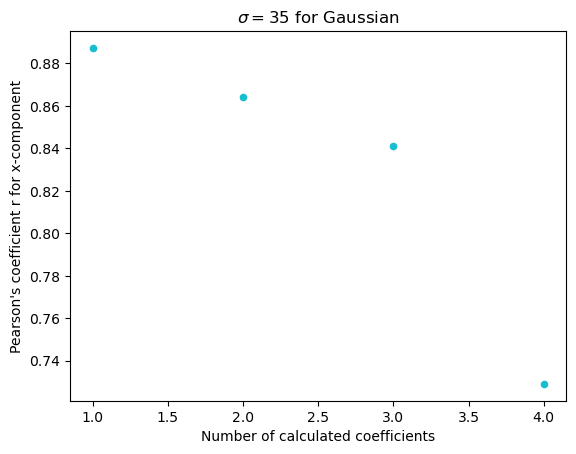

In [104]:
plt.scatter([1, 2, 3, 4], r_x, s = 20, c = '#17becf')
plt.title("$\sigma = 35$ for Gaussian")
plt.ylabel("Pearson's coefficient r for x-component")
plt.xlabel("Number of calculated coefficients") 

In [53]:
# sigma = 11, 3.7537537537537538, 22.5225225225
Vx_filtered11 = gaussian_filter(Vx_mean_sim, 11, mode = "wrap")
Vy_filtered11 = gaussian_filter(Vy_mean_sim, 11, mode = "wrap")

In [54]:
r_x_11 = []

In [55]:
r_1200_11 = pearsonr(Vx_FLCT_1200.flatten(), Vx_filtered11.flatten()) 
print(r_1200_11)
r_x_11.append(r_1200_11[0])

PearsonRResult(statistic=0.7701007515629695, pvalue=0.0)


In [56]:
r_600_11 = pearsonr(Vx_FLCT_600.flatten(), Vx_filtered11.flatten()) 
print(r_600_11)
r_x_11.append(r_600_11[0])

PearsonRResult(statistic=0.8189815247005816, pvalue=0.0)


In [57]:
r_300_11 = pearsonr(Vx_FLCT_300.flatten(), Vx_filtered11.flatten()) 
print(r_300_11)
r_x_11.append(r_300_11[0])

PearsonRResult(statistic=0.8268185210633833, pvalue=0.0)


In [58]:
r_100_11 = pearsonr(Vx_FLCT_100.flatten(), Vx_filtered11.flatten()) 
print(r_100_11)
r_x_11.append(r_100_11[0])

PearsonRResult(statistic=0.7306289570589544, pvalue=0.0)


Text(0.5, 0, 'Number of calculated coefficients')

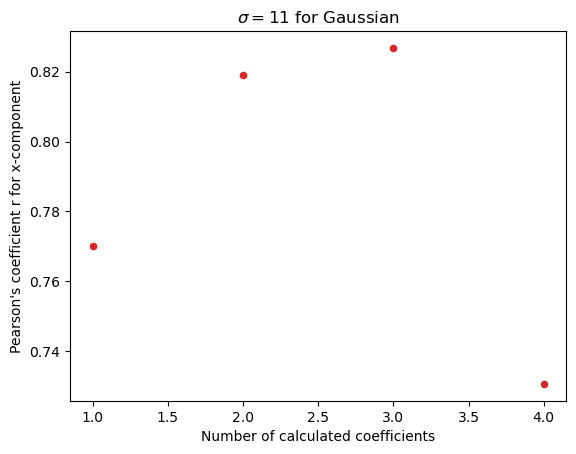

In [59]:
plt.scatter([1, 2, 3, 4], r_x_11, s = 20, c = '#d62728')
plt.title("$\sigma = 11$ for Gaussian")
plt.ylabel("Pearson's coefficient r for x-component")
plt.xlabel("Number of calculated coefficients") 

In [60]:
# sigma = 22.5 corresponds to 600 km
Vx_filtered22_5 = gaussian_filter(Vx_mean_sim, 22.5, mode = "wrap")
Vy_filtered22_5 = gaussian_filter(Vy_mean_sim, 22.5, mode = "wrap")

In [61]:
r_x_22_5 = []

In [62]:
r_1200_22 = pearsonr(Vx_FLCT_1200.flatten(), Vx_filtered22_5.flatten()) 
print(r_1200_22)
r_x_22_5.append(r_1200_22[0])

PearsonRResult(statistic=0.8570769646900219, pvalue=0.0)


In [63]:
r_600_22 = pearsonr(Vx_FLCT_600.flatten(), Vx_filtered22_5.flatten()) 
print(r_600_22)
r_x_22_5.append(r_600_22[0])

PearsonRResult(statistic=0.8750187889897892, pvalue=0.0)


In [64]:
r_300_22 = pearsonr(Vx_FLCT_300.flatten(), Vx_filtered22_5.flatten()) 
print(r_300_22)
r_x_22_5.append(r_300_22[0])

PearsonRResult(statistic=0.8666059942449804, pvalue=0.0)


In [65]:
r_100_22 = pearsonr(Vx_FLCT_100.flatten(), Vx_filtered22_5.flatten()) 
print(r_100_22)
r_x_22_5.append(r_100_22[0])

PearsonRResult(statistic=0.7572806800412075, pvalue=0.0)


Text(0.5, 0, 'Number of calculated coefficients')

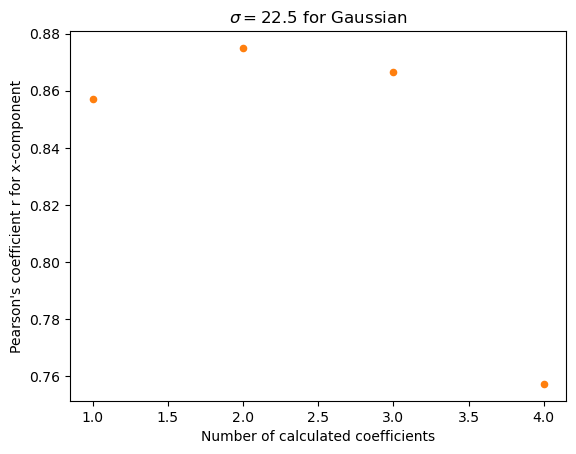

In [67]:
plt.scatter([1, 2, 3, 4], r_x_22_5, s = 20, c = '#ff7f0e')
plt.title("$\sigma = 22.5$ for Gaussian")
plt.ylabel("Pearson's coefficient r for x-component")
plt.xlabel("Number of calculated coefficients") 

In [84]:
# sigma = 3.75 corresponds to 100 km
Vx_filtered3_75 = gaussian_filter(Vx_mean_sim, 3.75, mode = "wrap")
Vy_filtered3_75 = gaussian_filter(Vy_mean_sim, 3.75, mode = "wrap")

In [85]:
r_x_3_75 = []

In [86]:
r_1200_3_75 = pearsonr(Vx_FLCT_1200.flatten(), Vx_filtered3_75.flatten()) 
print(r_1200_3_75)
r_x_3_75.append(r_1200_3_75[0])

PearsonRResult(statistic=0.7123077571685266, pvalue=0.0)


In [87]:
r_600_3_75 = pearsonr(Vx_FLCT_600.flatten(), Vx_filtered3_75.flatten()) 
print(r_600_3_75)
r_x_3_75.append(r_600_3_75[0])

PearsonRResult(statistic=0.7685418011916962, pvalue=0.0)


In [88]:
r_300_3_75 = pearsonr(Vx_FLCT_300.flatten(), Vx_filtered3_75.flatten()) 
print(r_300_3_75)
r_x_3_75.append(r_300_3_75[0])

PearsonRResult(statistic=0.7826529513682919, pvalue=0.0)


In [89]:
r_100_3_75 = pearsonr(Vx_FLCT_100.flatten(), Vx_filtered3_75.flatten()) 
print(r_100_3_75)
r_x_3_75.append(r_100_3_75[0])

PearsonRResult(statistic=0.6964317050293753, pvalue=0.0)


Text(0.5, 0, 'Number of calculated coefficients')

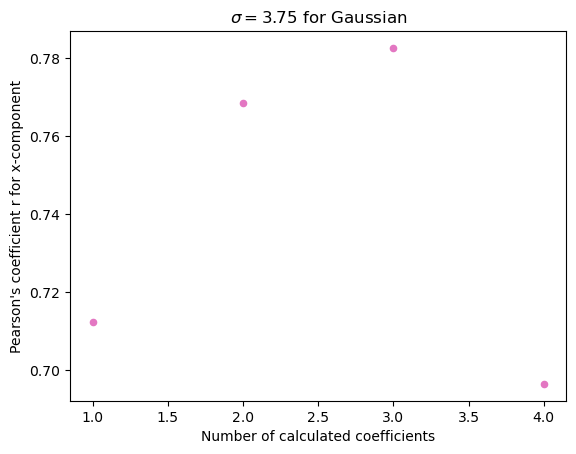

In [90]:
plt.scatter([1, 2, 3, 4], r_x_3_75, s = 20, c = '#e377c2')
plt.title("$\sigma = 3.75$ for Gaussian")
plt.ylabel("Pearson's coefficient r for x-component")
plt.xlabel("Number of calculated coefficients") 

In [91]:
r_x_best = [r_x[0], r_x_22_5[1], r_x_11[2], r_x_3_75[3]]

Text(0.5, 0, 'Number of calculated coefficients')

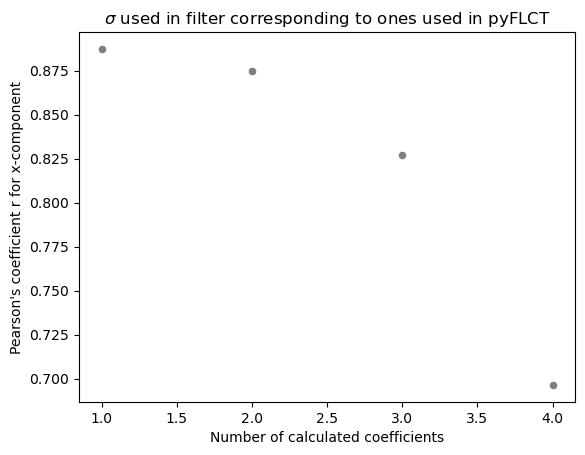

In [92]:
plt.scatter([1, 2, 3, 4], r_x_best, s = 20, c = '#7f7f7f')
plt.title("$\sigma$ used in filter corresponding to ones used in pyFLCT")
plt.ylabel("Pearson's coefficient r for x-component")
plt.xlabel("Number of calculated coefficients") 

In [96]:
# Let's see how our velocities compare to each other based on FWHM
# To that end, we will plot each of them vs simulation

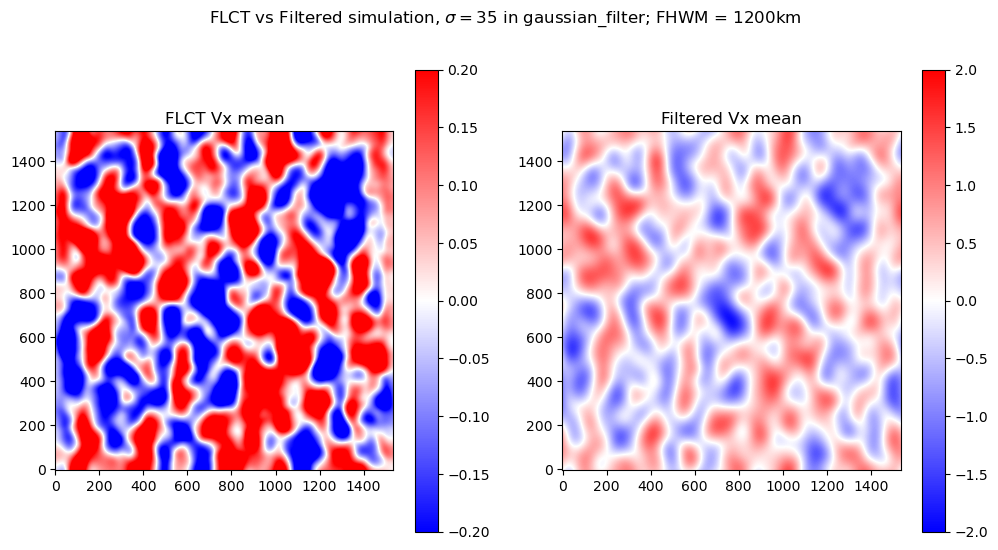

In [106]:
fig = plt.figure(figsize = (12,6))
fig.suptitle("FLCT vs Filtered simulation, $\sigma = 35$ in gaussian_filter; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(Vx_FLCT_1200[:, :], origin='lower',cmap='bwr', vmin = -0.2, vmax = 0.2)
ax1.set_title("FLCT Vx mean") 
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_filtered35[:, :], origin='lower', cmap='bwr', vmin = -2, vmax = 2)
ax2.set_title("Filtered Vx mean") 
fig.colorbar(im2)

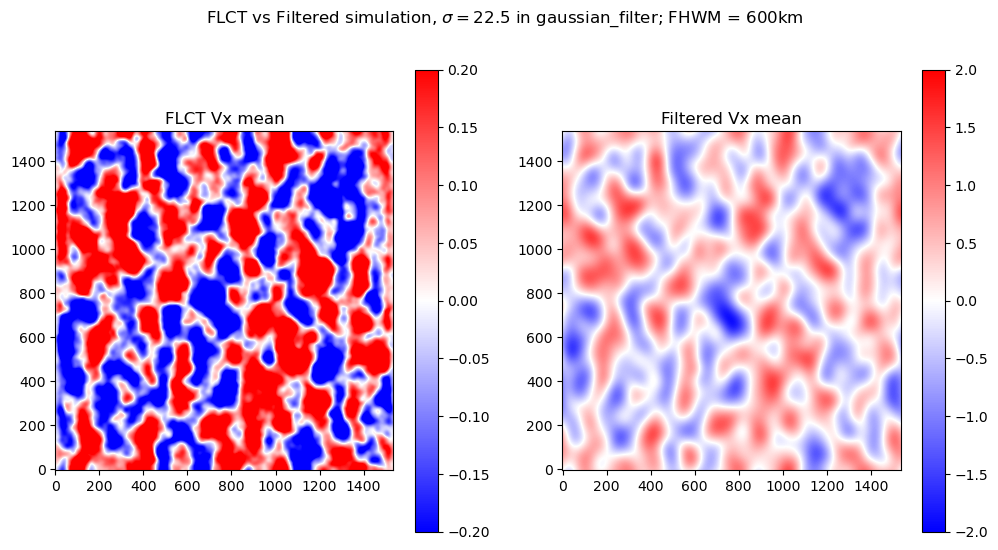

In [107]:
fig = plt.figure(figsize = (12,6))
fig.suptitle("FLCT vs Filtered simulation, $\sigma = 35$ in gaussian_filter; FHWM = 600km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(Vx_FLCT_600[:, :], origin='lower',cmap='bwr', vmin = -0.2, vmax = 0.2)
ax1.set_title("FLCT Vx mean") 
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_filtered35[:, :], origin='lower', cmap='bwr', vmin = -2, vmax = 2)
ax2.set_title("Filtered Vx mean") 
fig.colorbar(im2)

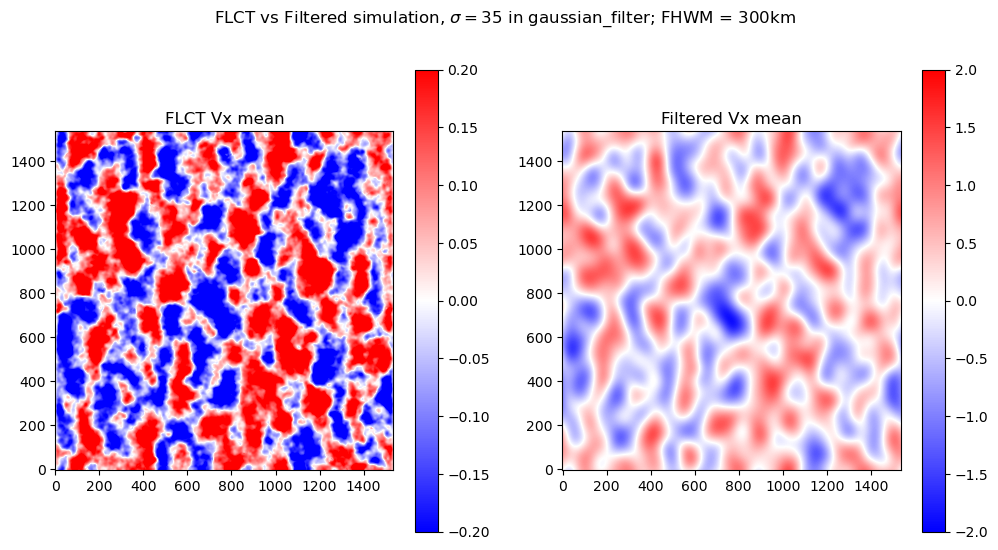

In [108]:
fig = plt.figure(figsize = (12,6))
fig.suptitle("FLCT vs Filtered simulation, $\sigma = 35$ in gaussian_filter; FHWM = 300km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(Vx_FLCT_300[:, :], origin='lower',cmap='bwr', vmin = -0.2, vmax = 0.2)
ax1.set_title("FLCT Vx mean") 
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_filtered35[:, :], origin='lower', cmap='bwr', vmin = -2, vmax = 2)
ax2.set_title("Filtered Vx mean") 
fig.colorbar(im2)

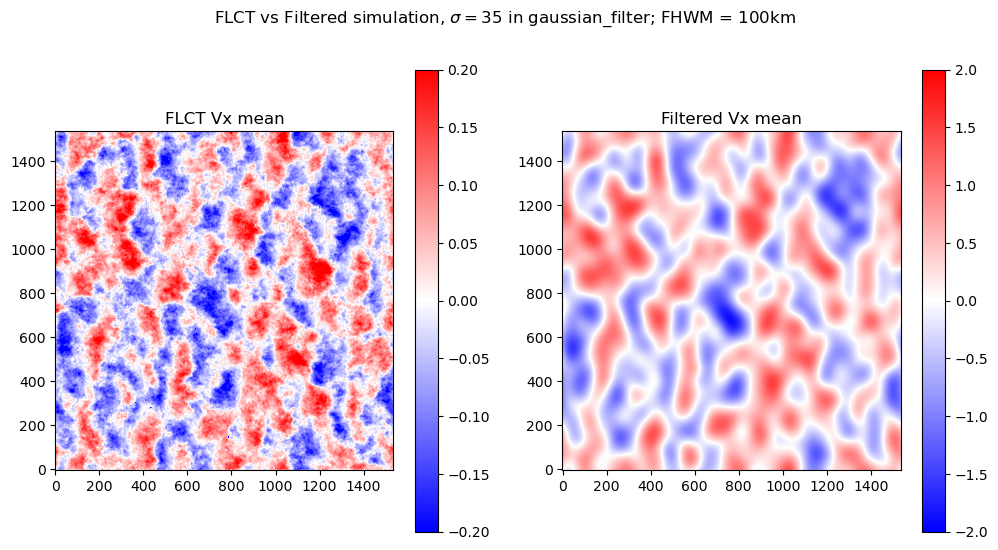

In [109]:
fig = plt.figure(figsize = (12,6))
fig.suptitle("FLCT vs Filtered simulation, $\sigma = 35$ in gaussian_filter; FHWM = 100km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(Vx_FLCT_100[:, :], origin='lower',cmap='bwr', vmin = -0.2, vmax = 0.2)
ax1.set_title("FLCT Vx mean") 
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_filtered35[:, :], origin='lower', cmap='bwr', vmin = -2, vmax = 2)
ax2.set_title("Filtered Vx mean") 
fig.colorbar(im2)

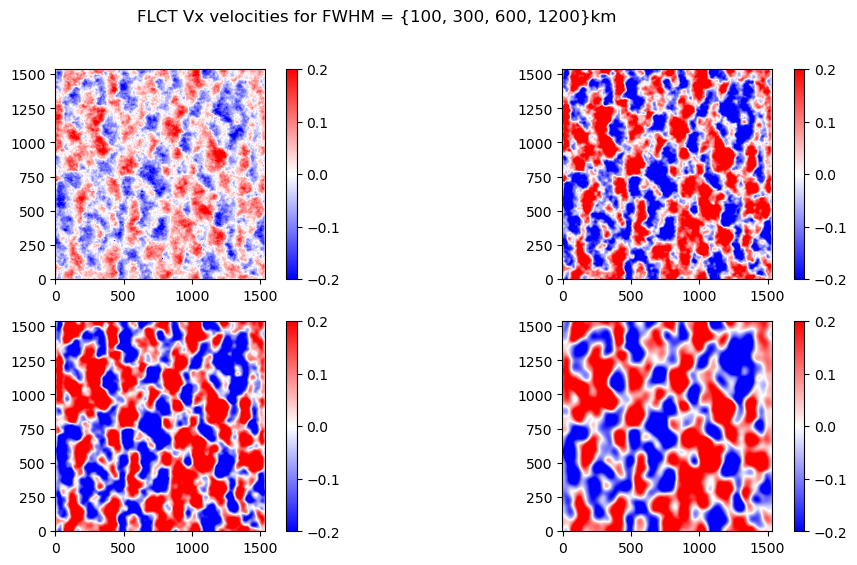

In [129]:
fig = plt.figure(figsize = (12,6)) 
fig.suptitle("FLCT Vx velocities for FWHM = {100, 300, 600, 1200}km")
ax = fig.add_subplot(221)
im = ax.imshow(Vx_FLCT_100[:, :], origin='lower',cmap='bwr', vmin = -0.2, vmax = 0.2) #row=0, col=0
fig.colorbar(im)

ax1 = fig.add_subplot(222)
im1 = ax1.imshow(Vx_FLCT_300[:, :], origin='lower',cmap='bwr', vmin = -0.2, vmax = 0.2) #row=0, col=0
fig.colorbar(im1)

ax2 = fig.add_subplot(223)
im2 = ax2.imshow(Vx_FLCT_600[:, :], origin='lower',cmap='bwr', vmin = -0.2, vmax = 0.2) #row=0, col=0
fig.colorbar(im2)

ax3 = fig.add_subplot(224)
im3 = ax3.imshow(Vx_FLCT_1200[:, :], origin='lower',cmap='bwr', vmin = -0.2, vmax = 0.2) #row=0, col=0
fig.colorbar(im3)

plt.show()

<h1>FHWM = 1200km</h1>

Text(0.5, 1.0, 'Flow Field based on velocity from simulation')

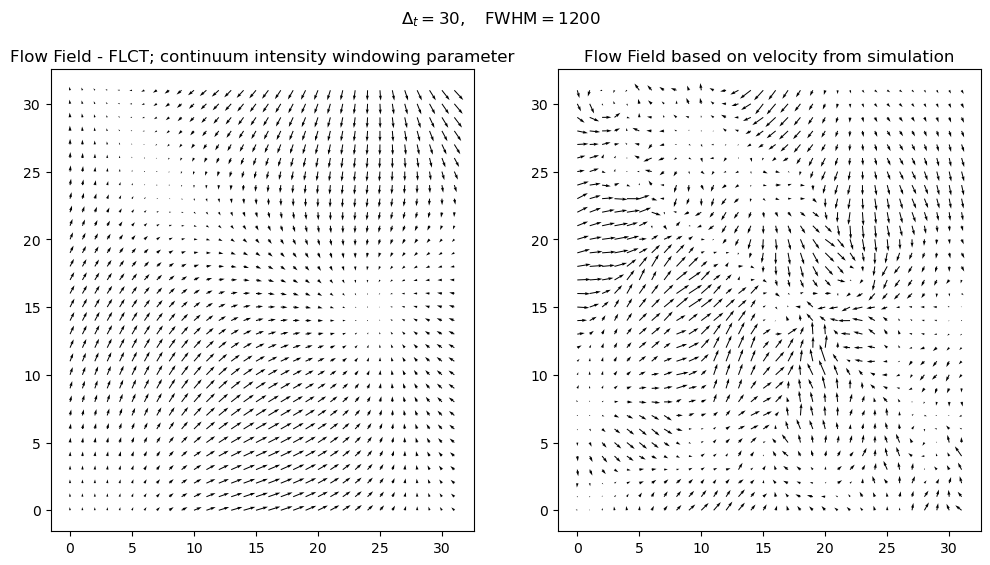

In [135]:
# Here we use quiver to represent velocities as vectors
# Plotting side by side comparison

i_start = 0
j_start = 0
i_end = 128
j_end = 128
# But first we need to create a meshgrid on which the flow field will be plotted - prvi pokusaj
X = np.arange(0, 32, 1)
Y = np.arange(0, 32, 1)
U, V = np.meshgrid(X, Y)

fig = plt.figure(figsize=(12, 6))
fig.suptitle(r'$\Delta_t=30, \quad \mathrm{FWHM}=1200$')
ax1 = fig.add_subplot(121)
ax1.quiver(U[i_start:i_end, j_start:j_end], V[i_start:i_end, j_start:j_end], \
           Vx_1200[0, i_start:i_end:4, j_start:j_end:4], Vy_1200[0, i_start:i_end:4, j_start:j_end:4])
ax1.set_title("Flow Field - FLCT; continuum intensity windowing parameter")

ax2 = fig.add_subplot(122)
ax2.quiver(U[i_start:i_end, j_start:j_end], V[i_start:i_end, j_start:j_end], \
         Vx[0, i_start:i_end:4, j_start:j_end:4], Vy[0, i_start:i_end:4, j_start:j_end:4])
ax2.set_title("Flow Field based on velocity from simulation") 

Text(0.5, 1.0, 'Flow Field based on MEAN velocity from simulation')

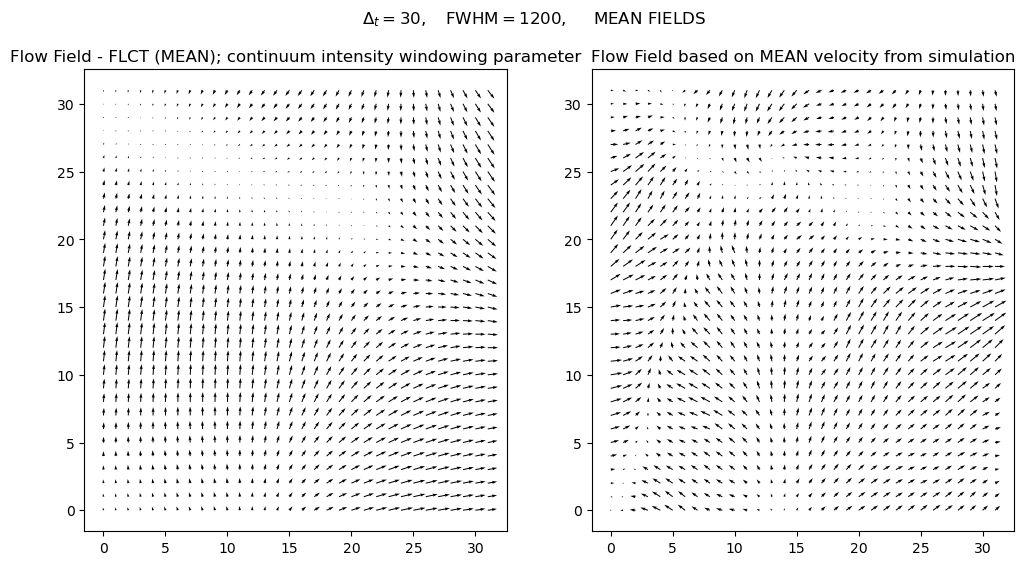

In [140]:
# Here we use quiver to represent velocities as vectors
# Plotting side by side comparison

i_start = 0
j_start = 0
i_end = 128
j_end = 128
# But first we need to create a meshgrid on which the flow field will be plotted - prvi pokusaj
X = np.arange(0, 32, 1)
Y = np.arange(0, 32, 1)
U, V = np.meshgrid(X, Y)

fig = plt.figure(figsize=(12, 6))
fig.suptitle(r'$\Delta_t=30, \quad \mathrm{FWHM}=1200$, $\quad$ MEAN FIELDS')
ax1 = fig.add_subplot(121)
ax1.quiver(U[i_start:i_end, j_start:j_end], V[i_start:i_end, j_start:j_end], \
           Vx_FLCT_1200[i_start:i_end:4, j_start:j_end:4], Vy_FLCT_1200[i_start:i_end:4, j_start:j_end:4])
ax1.set_title("Flow Field - FLCT (MEAN); continuum intensity windowing parameter")

ax2 = fig.add_subplot(122)
ax2.quiver(U[i_start:i_end, j_start:j_end], V[i_start:i_end, j_start:j_end], \
         Vx_mean_sim[i_start:i_end:4, j_start:j_end:4], Vy_mean_sim[i_start:i_end:4, j_start:j_end:4])
ax2.set_title("Flow Field based on MEAN velocity from simulation") 

Text(0.5, 1.0, 'Flow Field based on MEAN velocity from simulation')

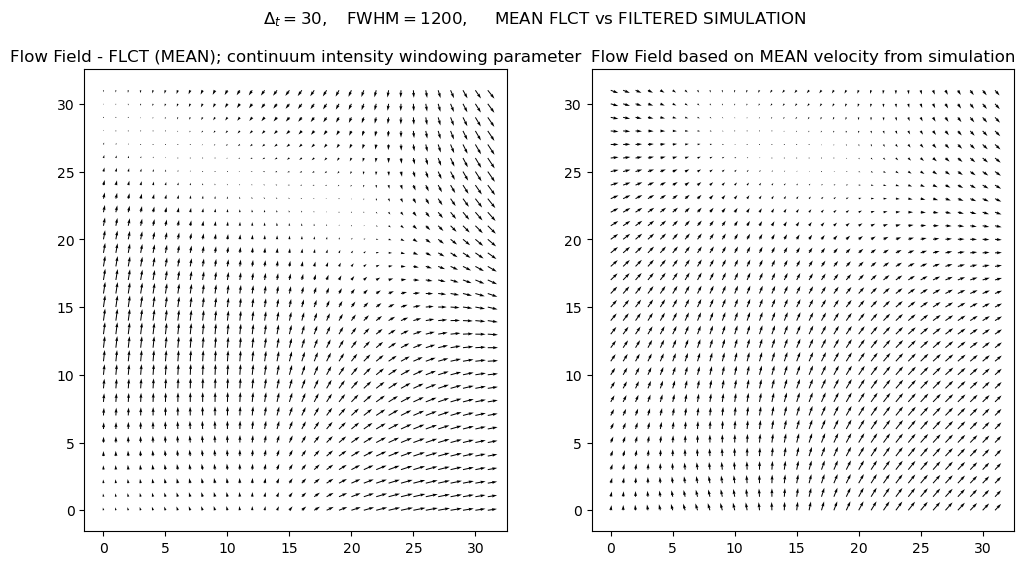

In [142]:
# Here we use quiver to represent velocities as vectors
# Plotting side by side comparison

i_start = 0
j_start = 0
i_end = 128
j_end = 128
# But first we need to create a meshgrid on which the flow field will be plotted - prvi pokusaj
X = np.arange(0, 32, 1)
Y = np.arange(0, 32, 1)
U, V = np.meshgrid(X, Y)

fig = plt.figure(figsize=(12, 6))
fig.suptitle(r'$\Delta_t=30, \quad \mathrm{FWHM}=1200$, $\quad$ MEAN FLCT vs FILTERED SIMULATION')
ax1 = fig.add_subplot(121)
ax1.quiver(U[i_start:i_end, j_start:j_end], V[i_start:i_end, j_start:j_end], \
           Vx_FLCT_1200[i_start:i_end:4, j_start:j_end:4], Vy_FLCT_1200[i_start:i_end:4, j_start:j_end:4])
ax1.set_title("Flow Field - FLCT (MEAN); continuum intensity windowing parameter")

ax2 = fig.add_subplot(122)
ax2.quiver(U[i_start:i_end, j_start:j_end], V[i_start:i_end, j_start:j_end], \
         Vx_filtered35[i_start:i_end:4, j_start:j_end:4], Vy_filtered35[i_start:i_end:4, j_start:j_end:4])
ax2.set_title("Flow Field based on MEAN velocity from simulation") 

<h1>FHWM = 600km</h1>

Text(0.5, 1.0, 'Flow Field based on velocity from simulation')

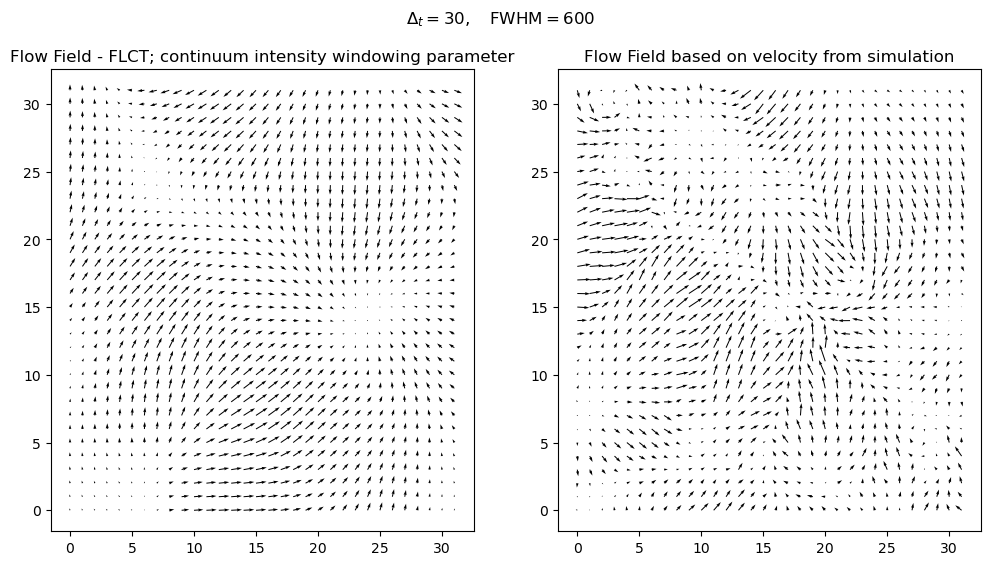

In [151]:
# Here we use quiver to represent velocities as vectors
# Plotting side by side comparison

i_start = 0
j_start = 0
i_end = 128
j_end = 128
# But first we need to create a meshgrid on which the flow field will be plotted - prvi pokusaj
X = np.arange(0, 32, 1)
Y = np.arange(0, 32, 1)
U, V = np.meshgrid(X, Y)

fig = plt.figure(figsize=(12, 6))
fig.suptitle(r'$\Delta_t=30, \quad \mathrm{FWHM}=600$')
ax1 = fig.add_subplot(121)
ax1.quiver(U[i_start:i_end, j_start:j_end], V[i_start:i_end, j_start:j_end], \
           Vx_600[0, i_start:i_end:4, j_start:j_end:4], Vy_600[0, i_start:i_end:4, j_start:j_end:4])
ax1.set_title("Flow Field - FLCT; continuum intensity windowing parameter")

ax2 = fig.add_subplot(122)
ax2.quiver(U[i_start:i_end, j_start:j_end], V[i_start:i_end, j_start:j_end], \
         Vx[0, i_start:i_end:4, j_start:j_end:4], Vy[0, i_start:i_end:4, j_start:j_end:4])
ax2.set_title("Flow Field based on velocity from simulation") 

Text(0.5, 1.0, 'Flow Field based on MEAN velocity from simulation')

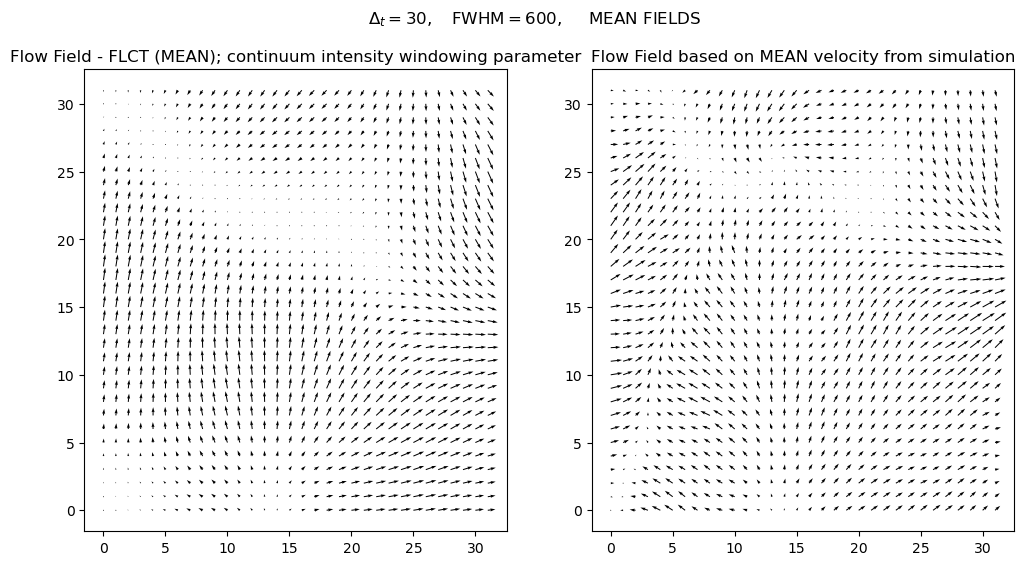

In [152]:
# Here we use quiver to represent velocities as vectors
# Plotting side by side comparison

i_start = 0
j_start = 0
i_end = 128
j_end = 128
# But first we need to create a meshgrid on which the flow field will be plotted - prvi pokusaj
X = np.arange(0, 32, 1)
Y = np.arange(0, 32, 1)
U, V = np.meshgrid(X, Y)

fig = plt.figure(figsize=(12, 6))
fig.suptitle(r'$\Delta_t=30, \quad \mathrm{FWHM}=600$, $\quad$ MEAN FIELDS')
ax1 = fig.add_subplot(121)
ax1.quiver(U[i_start:i_end, j_start:j_end], V[i_start:i_end, j_start:j_end], \
           Vx_FLCT_600[i_start:i_end:4, j_start:j_end:4], Vy_FLCT_600[i_start:i_end:4, j_start:j_end:4])
ax1.set_title("Flow Field - FLCT (MEAN); continuum intensity windowing parameter")

ax2 = fig.add_subplot(122)
ax2.quiver(U[i_start:i_end, j_start:j_end], V[i_start:i_end, j_start:j_end], \
         Vx_mean_sim[i_start:i_end:4, j_start:j_end:4], Vy_mean_sim[i_start:i_end:4, j_start:j_end:4])
ax2.set_title("Flow Field based on MEAN velocity from simulation") 

Text(0.5, 1.0, 'Flow Field based on MEAN velocity from simulation')

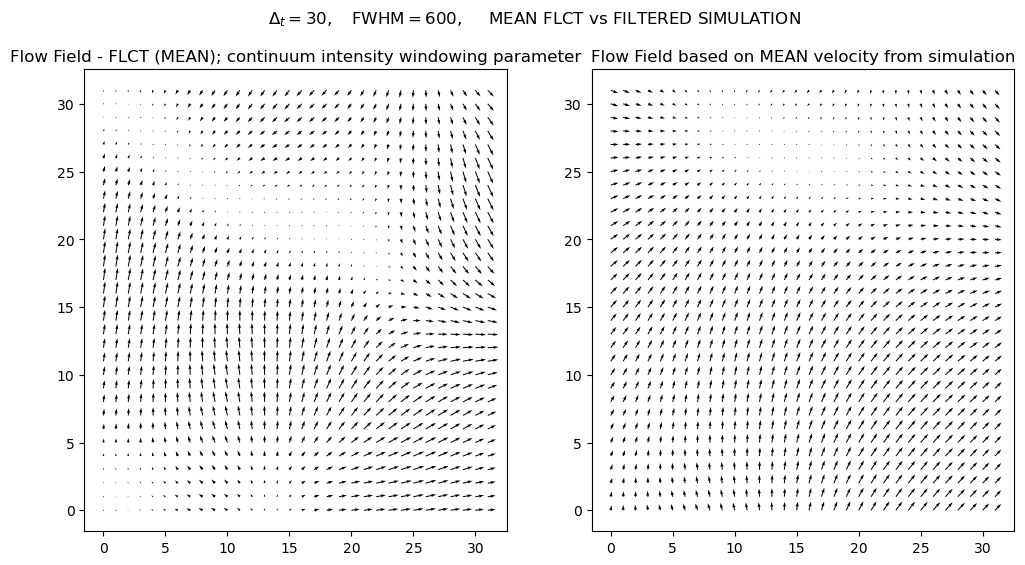

In [153]:
# Here we use quiver to represent velocities as vectors
# Plotting side by side comparison

i_start = 0
j_start = 0
i_end = 128
j_end = 128
# But first we need to create a meshgrid on which the flow field will be plotted - prvi pokusaj
X = np.arange(0, 32, 1)
Y = np.arange(0, 32, 1)
U, V = np.meshgrid(X, Y)

fig = plt.figure(figsize=(12, 6))
fig.suptitle(r'$\Delta_t=30, \quad \mathrm{FWHM}=600$, $\quad$ MEAN FLCT vs FILTERED SIMULATION')
ax1 = fig.add_subplot(121)
ax1.quiver(U[i_start:i_end, j_start:j_end], V[i_start:i_end, j_start:j_end], \
           Vx_FLCT_600[i_start:i_end:4, j_start:j_end:4], Vy_FLCT_600[i_start:i_end:4, j_start:j_end:4])
ax1.set_title("Flow Field - FLCT (MEAN); continuum intensity windowing parameter")

ax2 = fig.add_subplot(122)
ax2.quiver(U[i_start:i_end, j_start:j_end], V[i_start:i_end, j_start:j_end], \
         Vx_filtered35[i_start:i_end:4, j_start:j_end:4], Vy_filtered35[i_start:i_end:4, j_start:j_end:4])
ax2.set_title("Flow Field based on MEAN velocity from simulation") 

<h1>FHWM = 300km</h1>

Text(0.5, 1.0, 'Flow Field based on velocity from simulation')

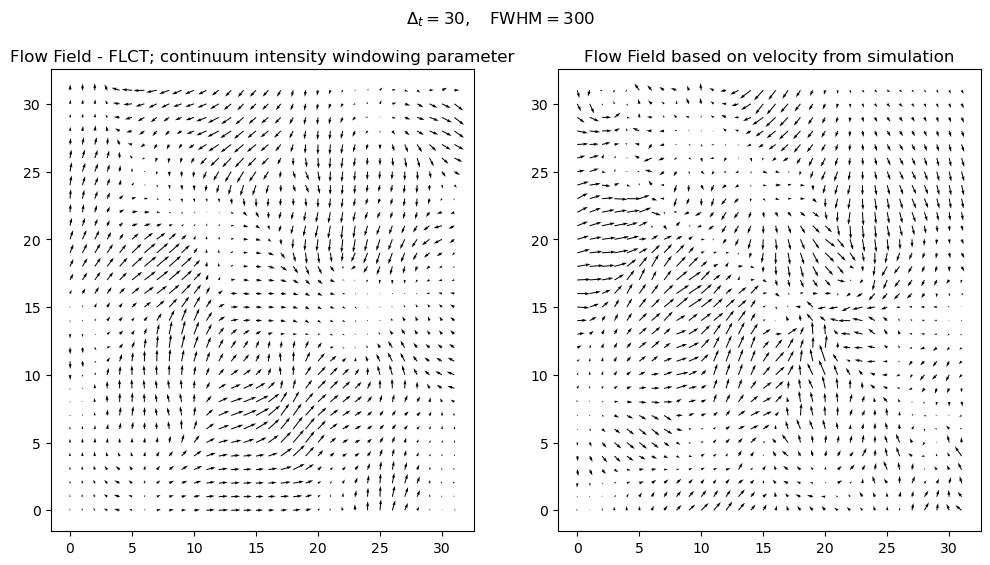

In [154]:
# Here we use quiver to represent velocities as vectors
# Plotting side by side comparison

i_start = 0
j_start = 0
i_end = 128
j_end = 128
# But first we need to create a meshgrid on which the flow field will be plotted - prvi pokusaj
X = np.arange(0, 32, 1)
Y = np.arange(0, 32, 1)
U, V = np.meshgrid(X, Y)

fig = plt.figure(figsize=(12, 6))
fig.suptitle(r'$\Delta_t=30, \quad \mathrm{FWHM}=300$')
ax1 = fig.add_subplot(121)
ax1.quiver(U[i_start:i_end, j_start:j_end], V[i_start:i_end, j_start:j_end], \
           Vx_300[0, i_start:i_end:4, j_start:j_end:4], Vy_300[0, i_start:i_end:4, j_start:j_end:4])
ax1.set_title("Flow Field - FLCT; continuum intensity windowing parameter")

ax2 = fig.add_subplot(122)
ax2.quiver(U[i_start:i_end, j_start:j_end], V[i_start:i_end, j_start:j_end], \
         Vx[0, i_start:i_end:4, j_start:j_end:4], Vy[0, i_start:i_end:4, j_start:j_end:4])
ax2.set_title("Flow Field based on velocity from simulation") 

Text(0.5, 1.0, 'Flow Field based on MEAN velocity from simulation')

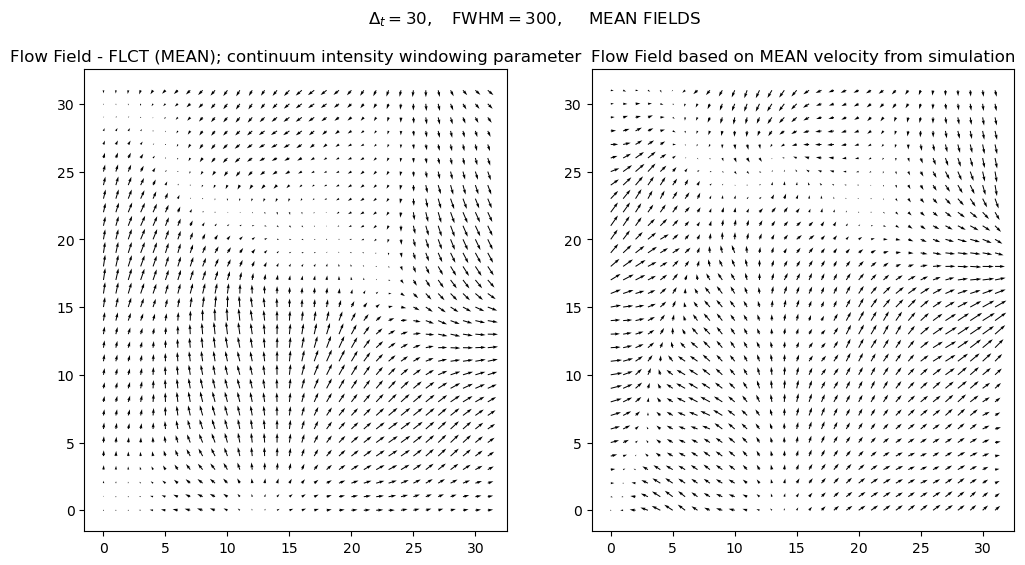

In [155]:
# Here we use quiver to represent velocities as vectors
# Plotting side by side comparison

i_start = 0
j_start = 0
i_end = 128
j_end = 128
# But first we need to create a meshgrid on which the flow field will be plotted - prvi pokusaj
X = np.arange(0, 32, 1)
Y = np.arange(0, 32, 1)
U, V = np.meshgrid(X, Y)

fig = plt.figure(figsize=(12, 6))
fig.suptitle(r'$\Delta_t=30, \quad \mathrm{FWHM}=300$, $\quad$ MEAN FIELDS')
ax1 = fig.add_subplot(121)
ax1.quiver(U[i_start:i_end, j_start:j_end], V[i_start:i_end, j_start:j_end], \
           Vx_FLCT_300[i_start:i_end:4, j_start:j_end:4], Vy_FLCT_300[i_start:i_end:4, j_start:j_end:4])
ax1.set_title("Flow Field - FLCT (MEAN); continuum intensity windowing parameter")

ax2 = fig.add_subplot(122)
ax2.quiver(U[i_start:i_end, j_start:j_end], V[i_start:i_end, j_start:j_end], \
         Vx_mean_sim[i_start:i_end:4, j_start:j_end:4], Vy_mean_sim[i_start:i_end:4, j_start:j_end:4])
ax2.set_title("Flow Field based on MEAN velocity from simulation") 

Text(0.5, 1.0, 'Flow Field based on MEAN velocity from simulation')

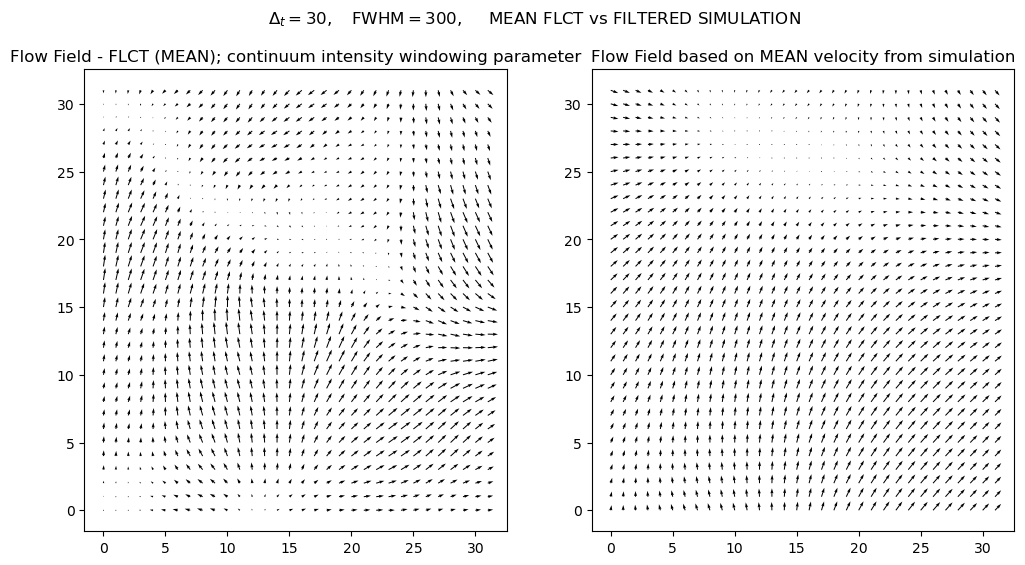

In [156]:
# Here we use quiver to represent velocities as vectors
# Plotting side by side comparison

i_start = 0
j_start = 0
i_end = 128
j_end = 128
# But first we need to create a meshgrid on which the flow field will be plotted - prvi pokusaj
X = np.arange(0, 32, 1)
Y = np.arange(0, 32, 1)
U, V = np.meshgrid(X, Y)

fig = plt.figure(figsize=(12, 6))
fig.suptitle(r'$\Delta_t=30, \quad \mathrm{FWHM}=300$, $\quad$ MEAN FLCT vs FILTERED SIMULATION')
ax1 = fig.add_subplot(121)
ax1.quiver(U[i_start:i_end, j_start:j_end], V[i_start:i_end, j_start:j_end], \
           Vx_FLCT_300[i_start:i_end:4, j_start:j_end:4], Vy_FLCT_300[i_start:i_end:4, j_start:j_end:4])
ax1.set_title("Flow Field - FLCT (MEAN); continuum intensity windowing parameter")

ax2 = fig.add_subplot(122)
ax2.quiver(U[i_start:i_end, j_start:j_end], V[i_start:i_end, j_start:j_end], \
         Vx_filtered35[i_start:i_end:4, j_start:j_end:4], Vy_filtered35[i_start:i_end:4, j_start:j_end:4])
ax2.set_title("Flow Field based on MEAN velocity from simulation") 

<h1>FWHM = 100km</h1>

Text(0.5, 1.0, 'Flow Field based on velocity from simulation')

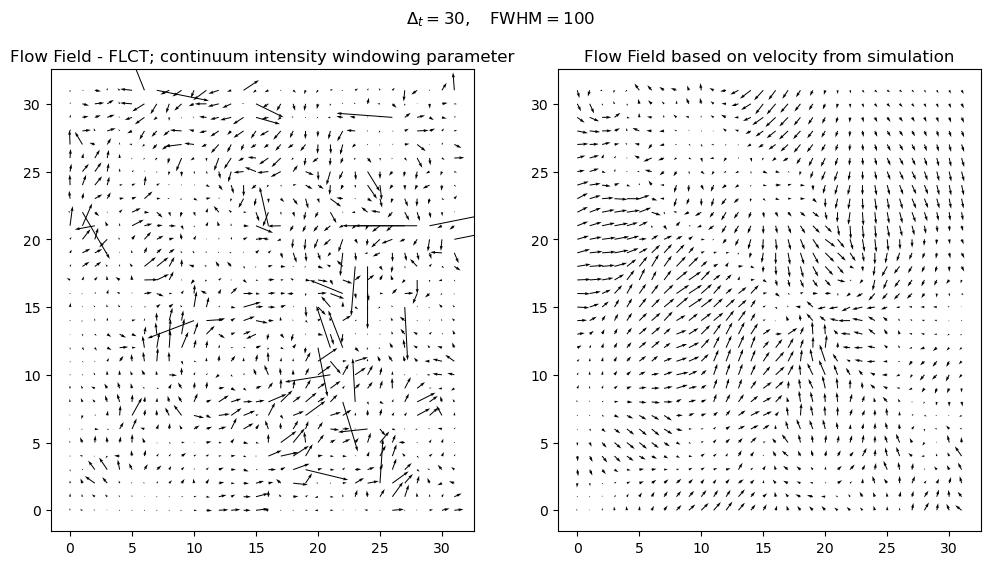

In [157]:
# Here we use quiver to represent velocities as vectors
# Plotting side by side comparison

i_start = 0
j_start = 0
i_end = 128
j_end = 128
# But first we need to create a meshgrid on which the flow field will be plotted - prvi pokusaj
X = np.arange(0, 32, 1)
Y = np.arange(0, 32, 1)
U, V = np.meshgrid(X, Y)

fig = plt.figure(figsize=(12, 6))
fig.suptitle(r'$\Delta_t=30, \quad \mathrm{FWHM}=100$')
ax1 = fig.add_subplot(121)
ax1.quiver(U[i_start:i_end, j_start:j_end], V[i_start:i_end, j_start:j_end], \
           Vx_100[0, i_start:i_end:4, j_start:j_end:4], Vy_100[0, i_start:i_end:4, j_start:j_end:4])
ax1.set_title("Flow Field - FLCT; continuum intensity windowing parameter")

ax2 = fig.add_subplot(122)
ax2.quiver(U[i_start:i_end, j_start:j_end], V[i_start:i_end, j_start:j_end], \
         Vx[0, i_start:i_end:4, j_start:j_end:4], Vy[0, i_start:i_end:4, j_start:j_end:4])
ax2.set_title("Flow Field based on velocity from simulation") 

Text(0.5, 1.0, 'Flow Field based on MEAN velocity from simulation')

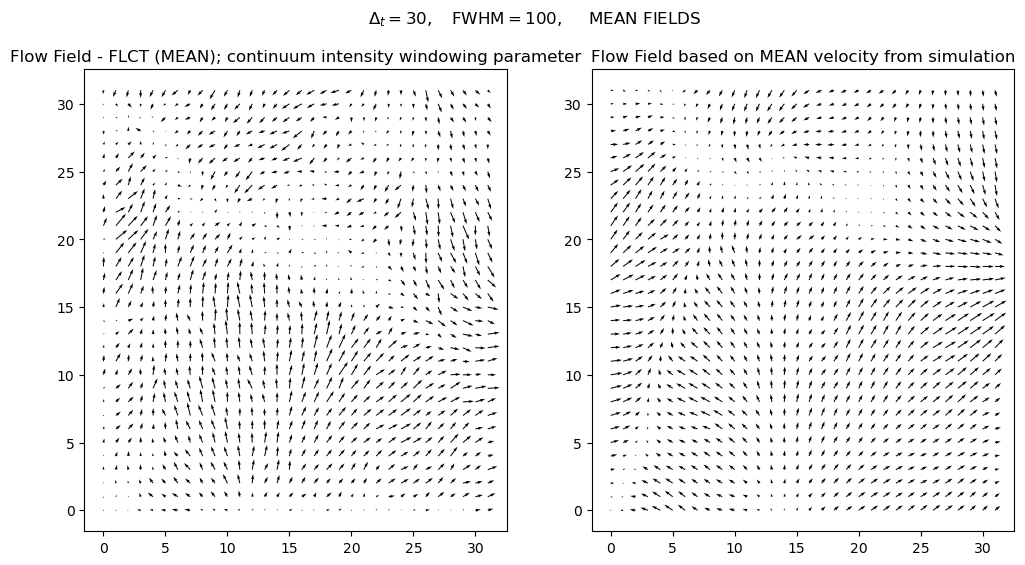

In [158]:
# Here we use quiver to represent velocities as vectors
# Plotting side by side comparison

i_start = 0
j_start = 0
i_end = 128
j_end = 128
# But first we need to create a meshgrid on which the flow field will be plotted - prvi pokusaj
X = np.arange(0, 32, 1)
Y = np.arange(0, 32, 1)
U, V = np.meshgrid(X, Y)

fig = plt.figure(figsize=(12, 6))
fig.suptitle(r'$\Delta_t=30, \quad \mathrm{FWHM}=100$, $\quad$ MEAN FIELDS')
ax1 = fig.add_subplot(121)
ax1.quiver(U[i_start:i_end, j_start:j_end], V[i_start:i_end, j_start:j_end], \
           Vx_FLCT_100[i_start:i_end:4, j_start:j_end:4], Vy_FLCT_100[i_start:i_end:4, j_start:j_end:4])
ax1.set_title("Flow Field - FLCT (MEAN); continuum intensity windowing parameter")

ax2 = fig.add_subplot(122)
ax2.quiver(U[i_start:i_end, j_start:j_end], V[i_start:i_end, j_start:j_end], \
         Vx_mean_sim[i_start:i_end:4, j_start:j_end:4], Vy_mean_sim[i_start:i_end:4, j_start:j_end:4])
ax2.set_title("Flow Field based on MEAN velocity from simulation") 

Text(0.5, 1.0, 'Flow Field based on MEAN velocity from simulation')

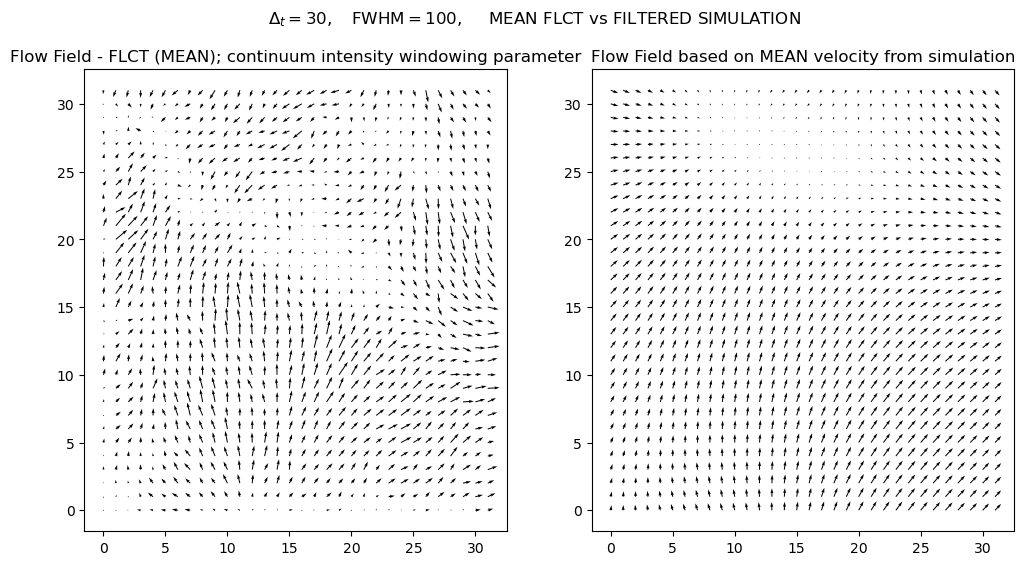

In [159]:
# Here we use quiver to represent velocities as vectors
# Plotting side by side comparison

i_start = 0
j_start = 0
i_end = 128
j_end = 128
# But first we need to create a meshgrid on which the flow field will be plotted - prvi pokusaj
X = np.arange(0, 32, 1)
Y = np.arange(0, 32, 1)
U, V = np.meshgrid(X, Y)

fig = plt.figure(figsize=(12, 6))
fig.suptitle(r'$\Delta_t=30, \quad \mathrm{FWHM}=100$, $\quad$ MEAN FLCT vs FILTERED SIMULATION')
ax1 = fig.add_subplot(121)
ax1.quiver(U[i_start:i_end, j_start:j_end], V[i_start:i_end, j_start:j_end], \
           Vx_FLCT_100[i_start:i_end:4, j_start:j_end:4], Vy_FLCT_100[i_start:i_end:4, j_start:j_end:4])
ax1.set_title("Flow Field - FLCT (MEAN); continuum intensity windowing parameter")

ax2 = fig.add_subplot(122)
ax2.quiver(U[i_start:i_end, j_start:j_end], V[i_start:i_end, j_start:j_end], \
         Vx_filtered35[i_start:i_end:4, j_start:j_end:4], Vy_filtered35[i_start:i_end:4, j_start:j_end:4])
ax2.set_title("Flow Field based on MEAN velocity from simulation") 

<h1>Comparison between all FWHM values</h1>

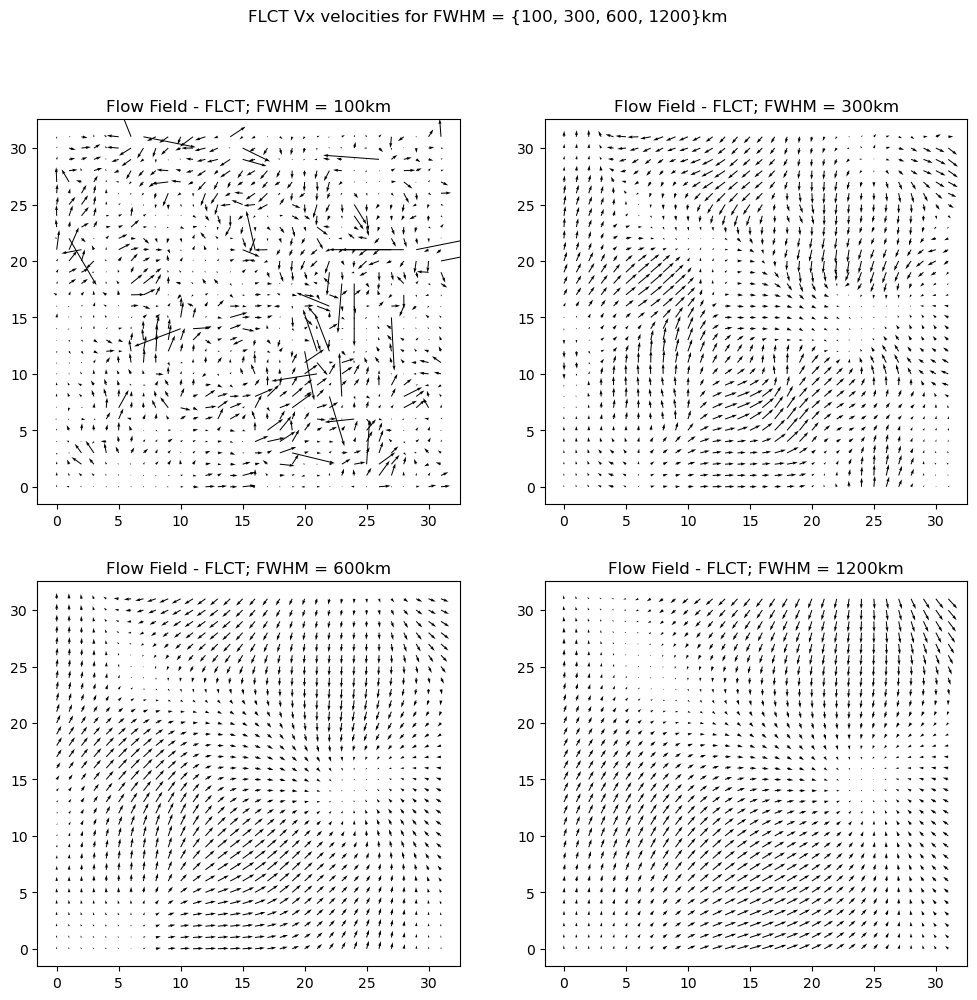

In [163]:
i_start = 0
j_start = 0
i_end = 128
j_end = 128
# But first we need to create a meshgrid on which the flow field will be plotted - prvi pokusaj
X = np.arange(0, 32, 1)
Y = np.arange(0, 32, 1)
U, V = np.meshgrid(X, Y)

fig = plt.figure(figsize = (12, 11)) 
fig.suptitle("FLCT Vx velocities for FWHM = {100, 300, 600, 1200}km")
ax = fig.add_subplot(221)
ax.quiver(U[i_start:i_end, j_start:j_end], V[i_start:i_end, j_start:j_end], \
           Vx_100[0, i_start:i_end:4, j_start:j_end:4], Vy_100[0, i_start:i_end:4, j_start:j_end:4])
ax.set_title("Flow Field - FLCT; FWHM = 100km")
ax1 = fig.add_subplot(222)
ax1.quiver(U[i_start:i_end, j_start:j_end], V[i_start:i_end, j_start:j_end], \
           Vx_300[0, i_start:i_end:4, j_start:j_end:4], Vy_300[0, i_start:i_end:4, j_start:j_end:4])
ax1.set_title("Flow Field - FLCT; FWHM = 300km")

ax2 = fig.add_subplot(223)
ax2.quiver(U[i_start:i_end, j_start:j_end], V[i_start:i_end, j_start:j_end], \
           Vx_600[0, i_start:i_end:4, j_start:j_end:4], Vy_600[0, i_start:i_end:4, j_start:j_end:4])
ax2.set_title("Flow Field - FLCT; FWHM = 600km")

ax3 = fig.add_subplot(224)
ax3.quiver(U[i_start:i_end, j_start:j_end], V[i_start:i_end, j_start:j_end], \
           Vx_1200[0, i_start:i_end:4, j_start:j_end:4], Vy_1200[0, i_start:i_end:4, j_start:j_end:4])
ax3.set_title("Flow Field - FLCT; FWHM = 1200km")

plt.show()

<h2>Temporaly averaged velocities for all FWHM values</h2>

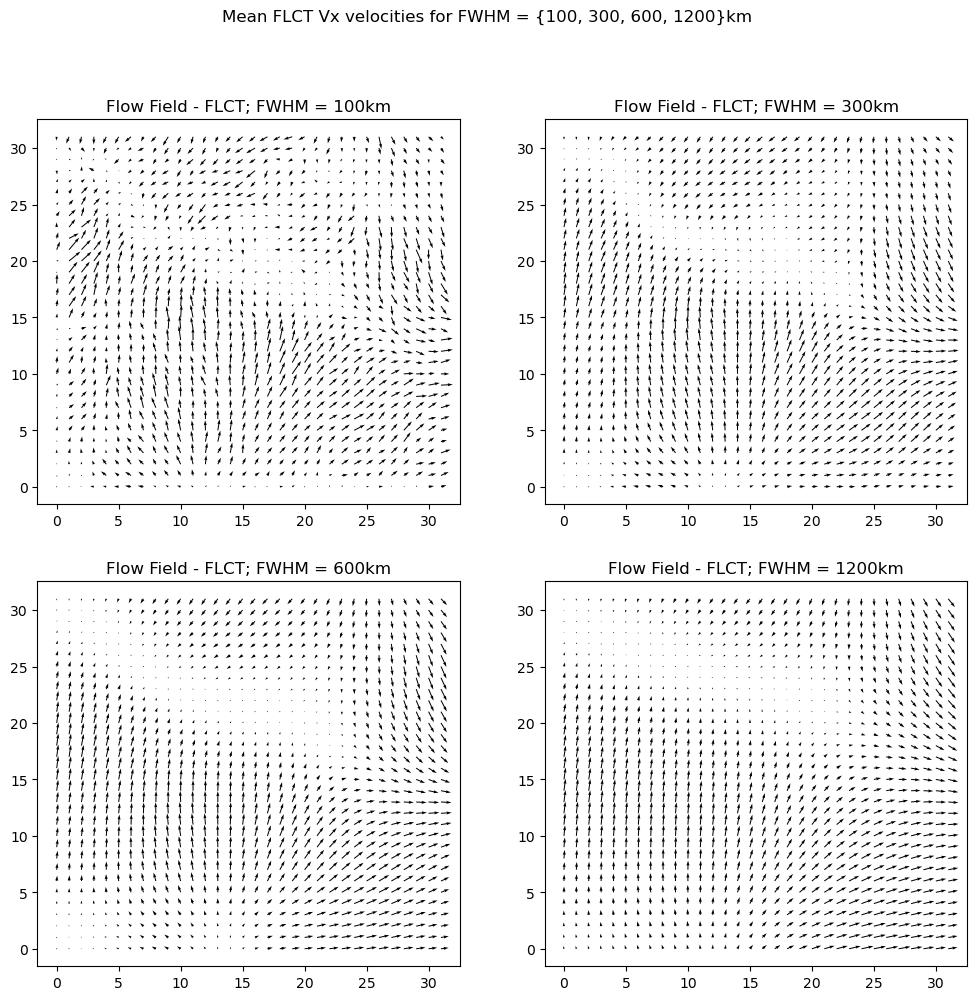

In [165]:
i_start = 0
j_start = 0
i_end = 128
j_end = 128
# But first we need to create a meshgrid on which the flow field will be plotted - prvi pokusaj
X = np.arange(0, 32, 1)
Y = np.arange(0, 32, 1)
U, V = np.meshgrid(X, Y)

fig = plt.figure(figsize = (12, 11)) 
fig.suptitle("Mean FLCT Vx velocities for FWHM = {100, 300, 600, 1200}km")
ax = fig.add_subplot(221)
ax.quiver(U[i_start:i_end, j_start:j_end], V[i_start:i_end, j_start:j_end], \
           Vx_FLCT_100[i_start:i_end:4, j_start:j_end:4], Vy_FLCT_100[i_start:i_end:4, j_start:j_end:4])
ax.set_title("Flow Field - FLCT; FWHM = 100km")
ax1 = fig.add_subplot(222)
ax1.quiver(U[i_start:i_end, j_start:j_end], V[i_start:i_end, j_start:j_end], \
           Vx_FLCT_300[i_start:i_end:4, j_start:j_end:4], Vy_FLCT_300[i_start:i_end:4, j_start:j_end:4])
ax1.set_title("Flow Field - FLCT; FWHM = 300km")

ax2 = fig.add_subplot(223)
ax2.quiver(U[i_start:i_end, j_start:j_end], V[i_start:i_end, j_start:j_end], \
           Vx_FLCT_600[i_start:i_end:4, j_start:j_end:4], Vy_FLCT_600[i_start:i_end:4, j_start:j_end:4])
ax2.set_title("Flow Field - FLCT; FWHM = 600km")

ax3 = fig.add_subplot(224)
ax3.quiver(U[i_start:i_end, j_start:j_end], V[i_start:i_end, j_start:j_end], \
           Vx_FLCT_1200[i_start:i_end:4, j_start:j_end:4], Vy_FLCT_1200[i_start:i_end:4, j_start:j_end:4])
ax3.set_title("Flow Field - FLCT; FWHM = 1200km")

plt.show()